In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False
import warnings

warnings.filterwarnings(action="ignore")
from scipy.stats import beta
from sklearn import neighbors, preprocessing  # 贝叶斯算法隶属naive_bayes
import sklearn.linear_model as LM
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split, KFold  # 验证参数在model_selection中
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_recall_curve  # 评估参数在metrics中
from sklearn import tree  # 决策树模拟
from sklearn.preprocessing import LabelEncoder, StandardScaler  # 对于分类型变量的数字化编码
from sklearn import ensemble #导入集成学习模型
import sklearn.neural_network as net
#引入网格搜索函数，与n折交叉误差，cv为几折
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [2]:
def SSE(Y, Y_): #和方差
    ram = 0
    i = 0
    while i < len(Y):
        ram = ram + (Y[i] - Y_[i]) ** 2
        i += 1 
    return ram  

    
def MSE(Y, Y_): #平均方差
    ram = 0
    i = 0
    while i < len(Y):
        ram = ram + (Y[i] - Y_[i]) ** 2
        i += 1 
    ram = ram/len(Y)
    return ram      
    
def RMSE(Y, Y_): #均方误差
    ram = 0
    i = 0
    while i < len(Y):
        ram = ram + (Y[i] - Y_[i]) ** 2
        i += 1 
    ram = ram/len(Y)
    return np.sqrt(ram)
    
def MAE(Y, Y_): #平均绝对误差
    ram = 0
    i = 0
    while i < len(Y):
        ram = ram + abs((Y[i] - Y_[i]))
        i += 1 
    return ram/len(Y)

             FT        MT        VF        pH         T      Days         D  \
FT     1.000000 -0.394675 -0.104415 -0.110419 -0.002542 -0.110981 -0.289206   
MT    -0.394675  1.000000  0.207584  0.051839  0.219690 -0.075792  0.768344   
VF    -0.104415  0.207584  1.000000  0.225222  0.084333 -0.159413  0.176889   
pH    -0.110419  0.051839  0.225222  1.000000 -0.030217 -0.154150 -0.009035   
T     -0.002542  0.219690  0.084333 -0.030217  1.000000 -0.165049  0.157925   
Days  -0.110981 -0.075792 -0.159413 -0.154150 -0.165049  1.000000 -0.050106   
D     -0.289206  0.768344  0.176889 -0.009035  0.157925 -0.050106  1.000000   
SD     0.265090 -0.215160  0.025776  0.122647  0.158822 -0.013971 -0.311354   
RF    -0.214367  0.033137 -0.097079 -0.001541 -0.155327  0.490805 -0.018555   
ILSSR -0.028830  0.173277 -0.112439 -0.298132 -0.251054 -0.290733  0.087063   

             SD        RF     ILSSR  
FT     0.265090 -0.214367 -0.028830  
MT    -0.215160  0.033137  0.173277  
VF     0.025776 

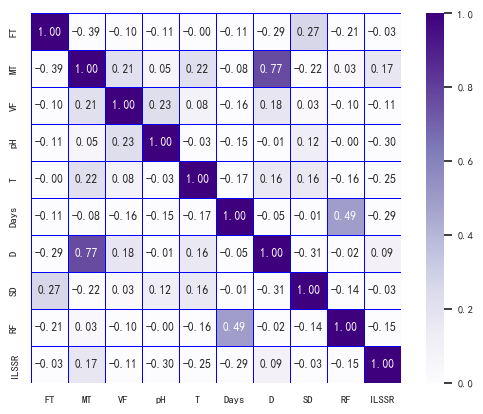

In [3]:
import seaborn as sns
data = pd.read_excel("C:/ILSS/0120.xlsx")
X = data[["FT", "MT", "VF", "pH", "T", "Days", "D", "SD", "RF"]]
Y = data["ILSSR"]
cor = data.corr(method="pearson")
print(cor)
rc = {'font.sans-serif': 'SimHei','axes.unicode_minus': False}
sns.set(font_scale=0.7,rc=rc) 
sns.heatmap(cor,
            annot=True,  # 显示相关系数的数据
            center=0.5,  # 居中
            fmt='.2f',  # 只显示两位小数
            linewidth=0.5,  # 设置每个单元格的距离
            linecolor='blue',  # 设置间距线的颜色
            vmin=0, vmax=1,  # 设置数值最小值和最大值
            xticklabels=True, yticklabels=True,  # 显示x轴和y轴
            square=True,  # 每个方格都是正方形
            cbar=True,  # 绘制颜色条
            cmap='Purples',  # 设置热力图颜色
            )
plt.ion()
plt.style.use("default")
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

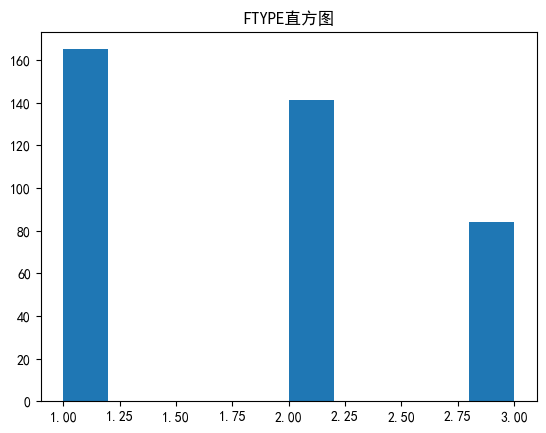

In [4]:
X = data[["FT", "MT", "VF", "pH", "T", "Days", "D", "SD", "RF"]]
plt.title("FTYPE直方图")
plt.hist([data["FT"]])
plt.show()

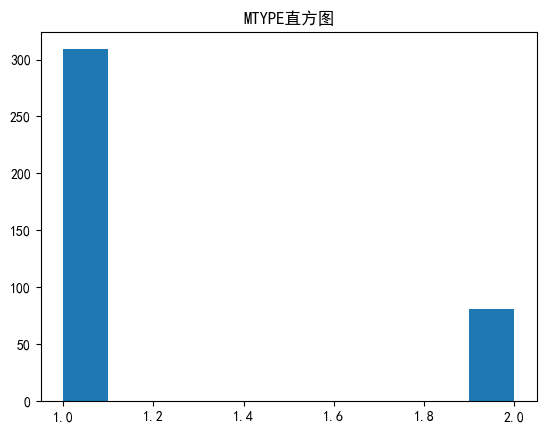

In [5]:
plt.title("MTYPE直方图")
plt.hist([data["MT"]])
plt.show()

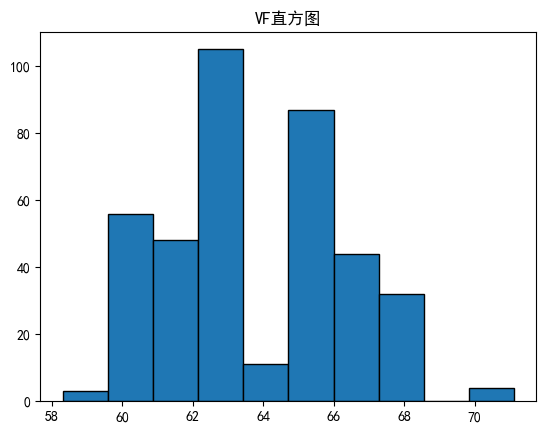

In [6]:
plt.title("VF直方图")
plt.hist([data["VF"]], edgecolor="black")
plt.show()

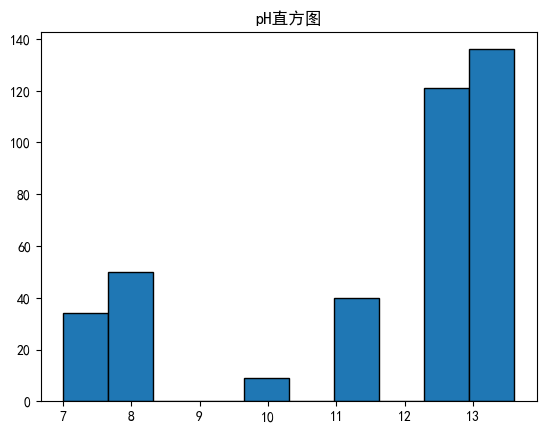

In [7]:
plt.title("pH直方图")
plt.hist([data["pH"]], edgecolor="black")
plt.show()

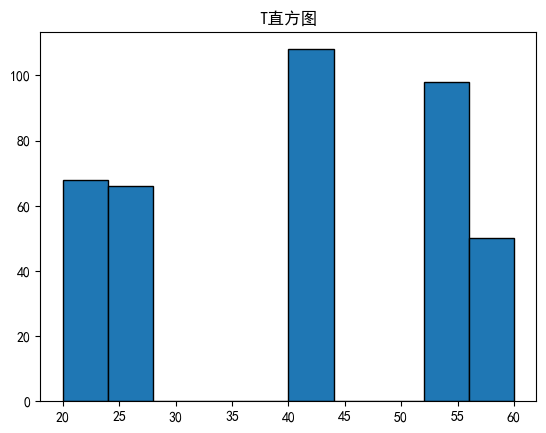

In [8]:
plt.title("T直方图")
plt.hist([data["T"]], edgecolor="black")
plt.show()

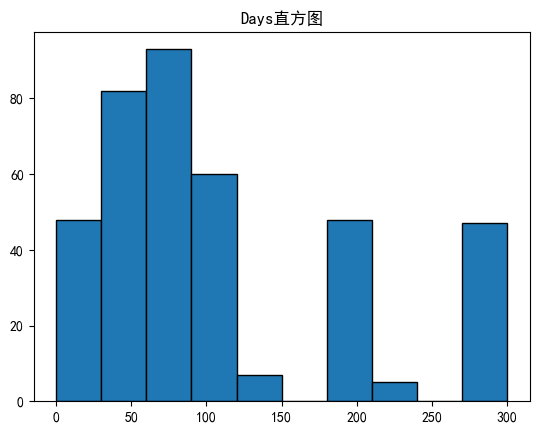

In [9]:
plt.title("Days直方图")
plt.hist([data["Days"]], edgecolor="black")
plt.show()

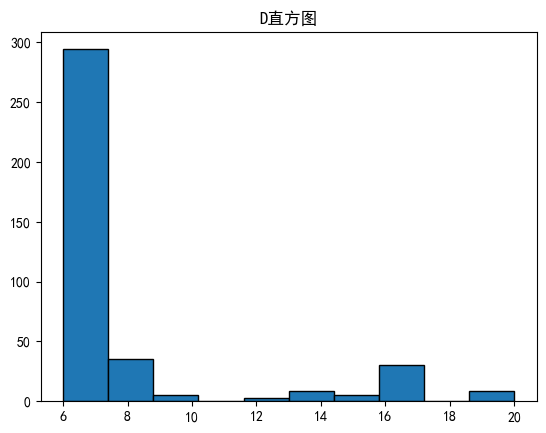

In [10]:
plt.title("D直方图")
plt.hist([data["D"]], edgecolor="black")
plt.show()

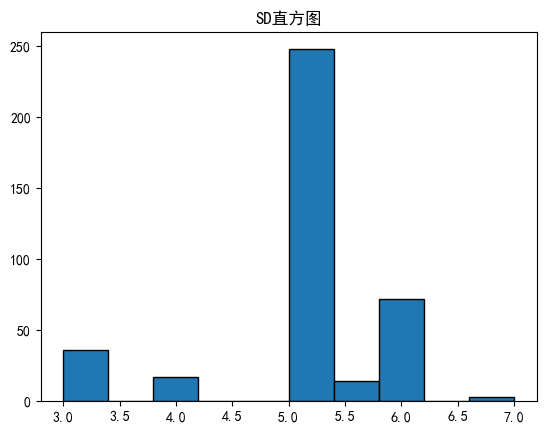

In [11]:
plt.title("SD直方图")
plt.hist([data["SD"]], edgecolor="black")
plt.show()

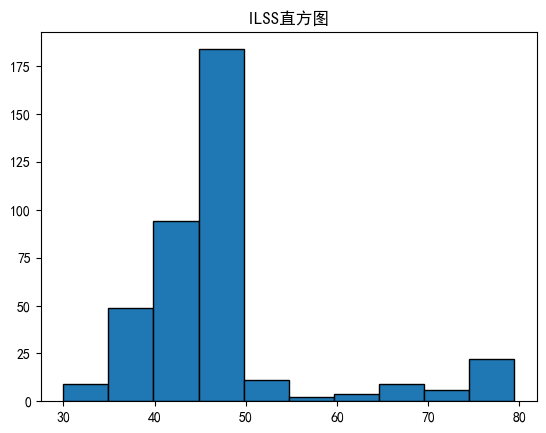

In [12]:
plt.title("ILSS直方图")
plt.hist([data["RF"]], edgecolor="black")
plt.show()

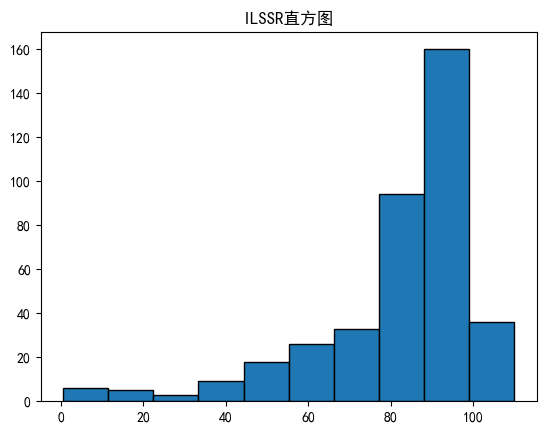

In [13]:
plt.title("ILSSR直方图")
plt.hist([data["ILSSR"]], edgecolor="black")
plt.show()

In [14]:
from xgboost import XGBRegressor
data = pd.read_excel("C:/ILSS/0120.xlsx")
X = data[["FT", "MT", "VF", "pH", "T", "Days", "D", "SD", "RF"]]
Y = data["ILSSR"]
p = []
for i in np.arange(1,1000,1):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=i)
    xgb = XGBRegressor(random_state=3)
    xgb.fit(X_train, Y_train)
    p.append(xgb.score(X_test, Y_test))
best_testscore = max(p)
best_random_state = p.index(best_testscore) + 1
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=best_random_state)
xgb = XGBRegressor(random_state=3)
xgb.fit(X_train, Y_train)
print("模型初始化完成。")
print("最佳随机种子:", best_random_state)
print("训练R方:", xgb.score(X_train, Y_train))
print("测试R方:", xgb.score(X_test, Y_test))
print("初始模型参数:")
print(xgb.get_params())

模型初始化完成。
最佳随机种子: 281
训练R方: 0.9991091713179253
测试R方: 0.921634415855542
初始模型参数:
{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 3, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [15]:
from xgboost import XGBRegressor
data = pd.read_excel("C:/ILSS/0120.xlsx")
X = data[["FT", "MT", "VF", "pH", "T", "Days", "D", "SD", "RF"]]
Y = data["ILSSR"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=281) #857也可以
xgb = XGBRegressor(random_state=3)
xgb.fit(X_train, Y_train)
print(xgb.score(X_train, Y_train))
print(xgb.score(X_test, Y_test))
Y_list = Y_test.tolist()
Y_predictlist = xgb.predict(X_test).tolist()
print("----------------------------------------------------------------------------")
print("训练R2:", xgb.score(X_train, Y_train))
print("测试R2:", xgb.score(X_test, Y_test))
print("SSE:", SSE(Y_list, Y_predictlist))
print("MSE:", MSE(Y_list, Y_predictlist))
print("RMSE:", RMSE(Y_list, Y_predictlist))
print("MAE:", MAE(Y_list, Y_predictlist))
print("----------------------------------------------------------------------------")
print(Y.count())

0.9991091713179253
0.921634415855542
----------------------------------------------------------------------------
训练R2: 0.9991091713179253
测试R2: 0.921634415855542
SSE: 2604.816968698497
MSE: 33.39508934228842
RMSE: 5.778848444308643
MAE: 4.04249272162587
----------------------------------------------------------------------------
390


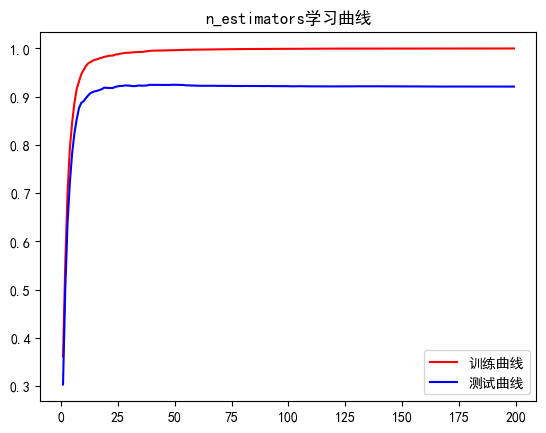

n_estimators调整后最佳测试R方: 0.9247554615770042
最佳estimators数量: 49


In [16]:
p1 = []
p2 = []
for i in np.arange(1, 200, 1):
    xgb1 = XGBRegressor(n_estimators=i, random_state=3, n_jobs=-1)
    xgb1.fit(X_train, Y_train)
    p1.append(xgb1.score(X_train, Y_train))
    p2.append(xgb1.score(X_test, Y_test))
plt.title("n_estimators学习曲线")
plt.plot(np.arange(1, 200, 1), p1, c="red", label="训练曲线")
plt.plot(np.arange(1, 200, 1), p2, c="blue", label="测试曲线")
plt.legend()
plt.show()
best_n_estimators = p2.index(max(p2)) + 1
print("n_estimators调整后最佳测试R方:", max(p2))
print("最佳estimators数量:", best_n_estimators)

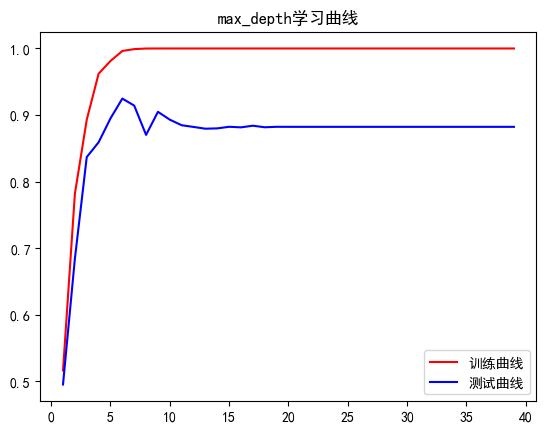

max_depth调整后最佳测试R方: 0.9247554615770042
最佳max_depth数量: 6


In [17]:
p1 = []
p2 = []
for i in np.arange(1, 40, 1):
    xgb2 = XGBRegressor(n_estimators=best_n_estimators, max_depth=i, random_state=3, n_jobs=-1)
    xgb2.fit(X_train, Y_train)
    p1.append(xgb2.score(X_train, Y_train))
    p2.append(xgb2.score(X_test, Y_test))
plt.title("max_depth学习曲线")
plt.plot(np.arange(1, 40, 1), p1, c="red", label="训练曲线")
plt.plot(np.arange(1, 40, 1), p2, c="blue", label="测试曲线")
plt.legend()
plt.show()
best_max_depth = p2.index(max(p2)) + 1
print("max_depth调整后最佳测试R方:", max(p2))
print("最佳max_depth数量:", best_max_depth)

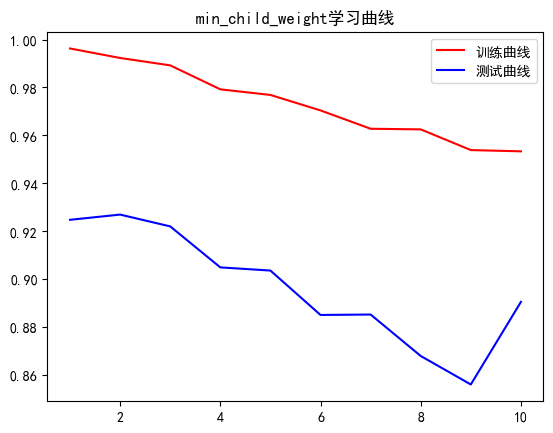

min_child_weight调整后最佳测试R方: 0.926930277754813
最佳min_child_weight数量: 2


In [18]:
p1 = []
p2 = []
for i in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    xgb = XGBRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth, n_jobs=-1,min_child_weight=i)
    xgb.fit(X_train, Y_train)
    p1.append(xgb.score(X_train, Y_train))
    p2.append(xgb.score(X_test, Y_test))
plt.title("min_child_weight学习曲线")
plt.plot(np.arange(1, 11, 1), p1, c="red", label="训练曲线")
plt.plot(np.arange(1, 11, 1), p2, c="blue", label="测试曲线")
plt.legend()
plt.show()
best_min_child_weight = p2.index(max(p2)) + 1
print("min_child_weight调整后最佳测试R方:", max(p2))
print("最佳min_child_weight数量:", best_min_child_weight)

In [19]:
xgb3 = XGBRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth, n_jobs=-1,min_child_weight=best_min_child_weight)
xgb3.fit(X_train, Y_train)
print(xgb3.score(X_train, Y_train))
print(xgb3.score(X_test, Y_test))
print("训练R2:", xgb3.score(X_train, Y_train))
print("测试R2:", xgb3.score(X_test, Y_test))
Y_list = Y_test.tolist()
Y_predictlist = xgb3.predict(X_test).tolist()
print("----------------------------------------------------------------------------")
print("训练R2:", xgb3.score(X_test, Y_test))
print("SSE:", SSE(Y_list, Y_predictlist))
print("MSE:", MSE(Y_list, Y_predictlist))
print("RMSE:", RMSE(Y_list, Y_predictlist))
print("MAE:", MAE(Y_list, Y_predictlist))
print("----------------------------------------------------------------------------")

0.9922918834488074
0.926930277754813
训练R2: 0.9922918834488074
测试R2: 0.926930277754813
----------------------------------------------------------------------------
训练R2: 0.926930277754813
SSE: 2428.786239269159
MSE: 31.138285118835373
RMSE: 5.580168914901714
MAE: 3.842460083860196
----------------------------------------------------------------------------


In [20]:
for i in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]:
    xgb5 = XGBRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth, n_jobs=-1, min_child_weight=best_min_child_weight, gamma=i)
    xgb5.fit(X_train, Y_train)
    print(xgb5.score(X_train, Y_train))
    print(xgb5.score(X_test, Y_test))
    print("训练R2:", xgb5.score(X_train, Y_train))
    print("测试R2:", xgb5.score(X_test, Y_test))
    Y_list = Y_test.tolist()
    Y_predictlist = xgb5.predict(X_test).tolist()
    print("----------------------------------------------------------------------------")
    print("SSE:", SSE(Y_list, Y_predictlist))
    print("MSE:", MSE(Y_list, Y_predictlist))
    print("RMSE:", RMSE(Y_list, Y_predictlist))
    print("MAE:", MAE(Y_list, Y_predictlist))
    print("----------------------------------------------------------------------------\n")

0.9920954485956598
0.9230480192950937
训练R2: 0.9920954485956598
测试R2: 0.9230480192950937
----------------------------------------------------------------------------
SSE: 2557.8297833600027
MSE: 32.792689530256446
RMSE: 5.726490158051129
MAE: 3.9202298625195455
----------------------------------------------------------------------------

0.9926295054121218
0.9247176478949546
训练R2: 0.9926295054121218
测试R2: 0.9247176478949546
----------------------------------------------------------------------------
SSE: 2502.3325015388787
MSE: 32.08118591716511
RMSE: 5.664025592912263
MAE: 3.7454841857921313
----------------------------------------------------------------------------

0.9923188574176094
0.9260149417284353
训练R2: 0.9923188574176094
测试R2: 0.9260149417284353
----------------------------------------------------------------------------
SSE: 2459.211365803972
MSE: 31.528350843640666
RMSE: 5.61501120601203
MAE: 3.713159650931058
-----------------------------------------------------------------

In [21]:
xgb5 = XGBRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth, n_jobs=-1, min_child_weight=best_min_child_weight, gamma=0.4)
xgb5.fit(X_train, Y_train)
Y_list = Y_test.tolist()
Y_predictlist = xgb5.predict(X_test).tolist()
print("----------------------------------------------------------------------------")
print("训练R2:", xgb5.score(X_train, Y_train))
print("测试R2:", xgb5.score(X_test, Y_test))
print("SSE:", SSE(Y_list, Y_predictlist))
print("MSE:", MSE(Y_list, Y_predictlist))
print("RMSE:", RMSE(Y_list, Y_predictlist))
print("MAE:", MAE(Y_list, Y_predictlist))
print("----------------------------------------------------------------------------")

----------------------------------------------------------------------------
训练R2: 0.9863282127806643
测试R2: 0.9286416026128445
SSE: 2371.9030031161756
MSE: 30.40901286046379
RMSE: 5.514436767292176
MAE: 3.7595870939603073
----------------------------------------------------------------------------


In [22]:
for i in [0.26, 0.27, 0.28, 0.29, 0.30, 0.31, 0.32, 0.33, 0.34, 0.35]:
    xgb5 = XGBRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth, n_jobs=-1, min_child_weight=best_min_child_weight, learning_rate=i, gamma=0.4)
    xgb5.fit(X_train, Y_train)
    print(xgb5.score(X_train, Y_train))
    print(xgb5.score(X_test, Y_test))
    print("训练R2:", xgb5.score(X_train, Y_train))
    print("测试R2:", xgb5.score(X_test, Y_test))
    Y_list = Y_test.tolist()
    Y_predictlist = xgb5.predict(X_test).tolist()
    print("----------------------------------------------------------------------------")
    print("SSE:", SSE(Y_list, Y_predictlist))
    print("MSE:", MSE(Y_list, Y_predictlist))
    print("RMSE:", RMSE(Y_list, Y_predictlist))
    print("MAE:", MAE(Y_list, Y_predictlist))
    print("----------------------------------------------------------------------------\n")

0.9846378808209224
0.9148951194971334
训练R2: 0.9846378808209224
测试R2: 0.9148951194971334
----------------------------------------------------------------------------
SSE: 2828.82644560242
MSE: 36.267005712851535
RMSE: 6.0222093713895015
MAE: 4.1885094577336845
----------------------------------------------------------------------------

0.9841286198708318
0.9180176915101617
训练R2: 0.9841286198708318
测试R2: 0.9180176915101617
----------------------------------------------------------------------------
SSE: 2725.0343453543683
MSE: 34.93633776095344
RMSE: 5.910696893002841
MAE: 4.192869108943168
----------------------------------------------------------------------------

0.9843076115631283
0.9151944048007531
训练R2: 0.9843076115631283
测试R2: 0.9151944048007531
----------------------------------------------------------------------------
SSE: 2818.8784123444348
MSE: 36.139466824928654
RMSE: 6.011611000799092
MAE: 4.228155376030986
-----------------------------------------------------------------

0.987406297939178
0.9300080026116994
训练R2: 0.987406297939178
测试R2: 0.9300080026116994
----------------------------------------------------------------------------
SSE: 2326.4848269881695
MSE: 29.82672855113038
RMSE: 5.461385222737028
MAE: 3.7830556117912226
----------------------------------------------------------------------------

----------------------------------------------------------------------------
SSE: 1482.6228277534399
MSE: 4.751996242799486
RMSE: 2.179907393170519
MAE: 1.5100618243782529
----------------------------------------------------------------------------

     FT  MT         VF     pH   T  Days     D   SD         RF
81    2   1  63.000000   8.20  40    30   6.0  6.0  38.000000
384   3   1  67.000000  13.40  40    63   6.0  5.0  43.420000
225   2   1  60.330000  11.00  40   180   6.0  5.0  45.790000
136   1   1  62.800000  12.43  20   300   6.0  6.0  79.420000
342   1   2  71.114753  12.80  60   126  12.0  7.0  69.600000
..   ..  ..        ...    ...  ..   ...   

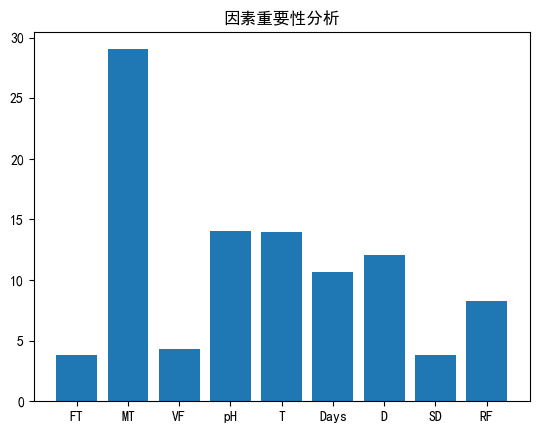

In [23]:
xgb5 = XGBRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth, n_jobs=-1, min_child_weight=best_min_child_weight, learning_rate=0.33, gamma=0.4)
xgb5.fit(X_train, Y_train)
print(xgb5.score(X_train, Y_train))
print(xgb5.score(X_test, Y_test))
print("训练R2:", xgb5.score(X_train, Y_train))
print("测试R2:", xgb5.score(X_test, Y_test))
Y_list = Y_test.tolist()
Y_predictlist = xgb5.predict(X_test).tolist()
Y_test.to_excel(r"C:\ILSS\test03061.xlsx")
pd.DataFrame(xgb5.predict(X_test)).to_excel(r"C:\ILSS\test03062.xlsx")
print("----------------------------------------------------------------------------")
print("SSE:", SSE(Y_list, Y_predictlist))
print("MSE:", MSE(Y_list, Y_predictlist))
print("RMSE:", RMSE(Y_list, Y_predictlist))
print("MAE:", MAE(Y_list, Y_predictlist))
print("----------------------------------------------------------------------------\n")
Y_list = Y_train.tolist()
Y_predictlist = xgb5.predict(X_train).tolist()
Y_train.to_excel(r"C:\ILSS\test03063.xlsx")
pd.DataFrame(xgb5.predict(X_train)).to_excel(r"C:\ILSS\test03064.xlsx")
print("----------------------------------------------------------------------------")
print("SSE:", SSE(Y_list, Y_predictlist))
print("MSE:", MSE(Y_list, Y_predictlist))
print("RMSE:", RMSE(Y_list, Y_predictlist))
print("MAE:", MAE(Y_list, Y_predictlist))
print("----------------------------------------------------------------------------\n")
importance=np.array(xgb5.feature_importances_) * 100
name=["FT", "MT", "VF", "pH", "T", "Days", "D", "SD", "RF"]
print(X_test)
print(importance)
plt.bar(name, importance)
plt.title("因素重要性分析")
plt.show()

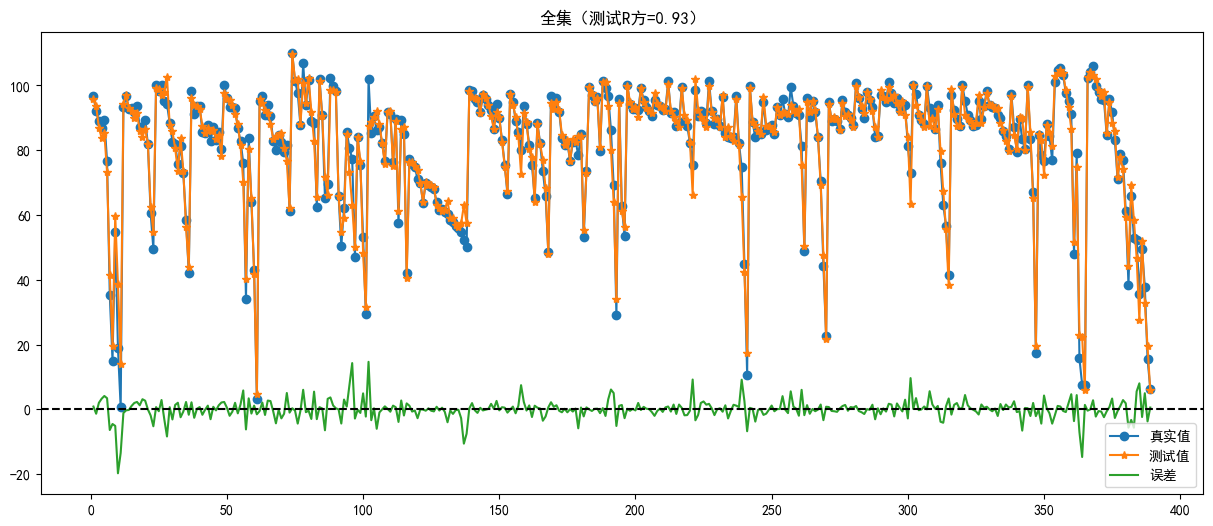

In [24]:
sequence = np.arange(1, 390, 1)
plt.figure(figsize=(15, 6))
plt.plot(sequence, Y[1:390], marker="o", label="真实值")
plt.plot(sequence, xgb5.predict(X[1:390]), marker="*", label="测试值")
plt.plot(sequence, np.array(Y[1:390]) - np.array(xgb5.predict(X[1:390])), label="误差")
plt.axhline(y=0, linestyle="--", color="black")
plt.title("全集（测试R方=%0.2f）"%(xgb5.score(X_test, Y_test)))
plt.legend()
plt.show()

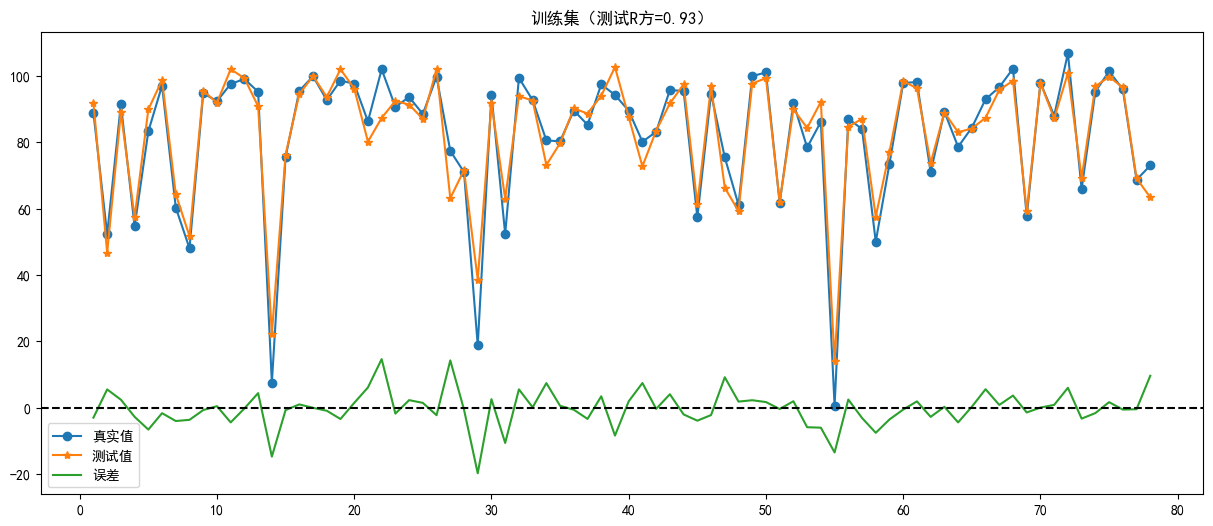

In [25]:
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False
sequence = np.arange(1, 79, 1)
plt.figure(figsize=(15, 6))
plt.plot(sequence, Y_test, marker="o", label="真实值")
plt.plot(sequence, xgb5.predict(X_test), marker="*", label="测试值")
plt.plot(sequence, np.array(Y_test) - np.array(xgb5.predict(X_test)), label="误差")
plt.axhline(y=0, linestyle="--", color="black")
plt.title("训练集（测试R方=%0.2f）"%(xgb5.score(X_test, Y_test)))
plt.legend()
plt.show()

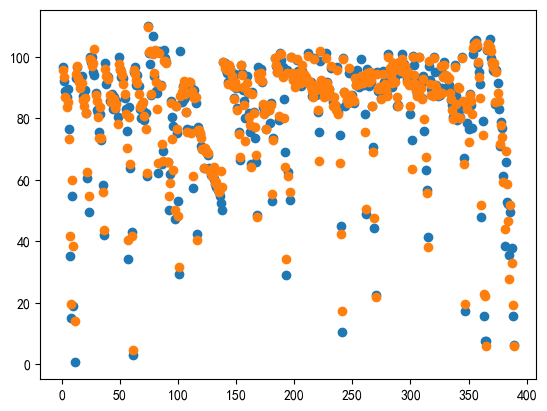

In [26]:
sequence = np.arange(1, 390, 1)
plt.scatter(sequence, Y[1:390])
plt.scatter(sequence, xgb5.predict(X[1:390]))
plt.show()

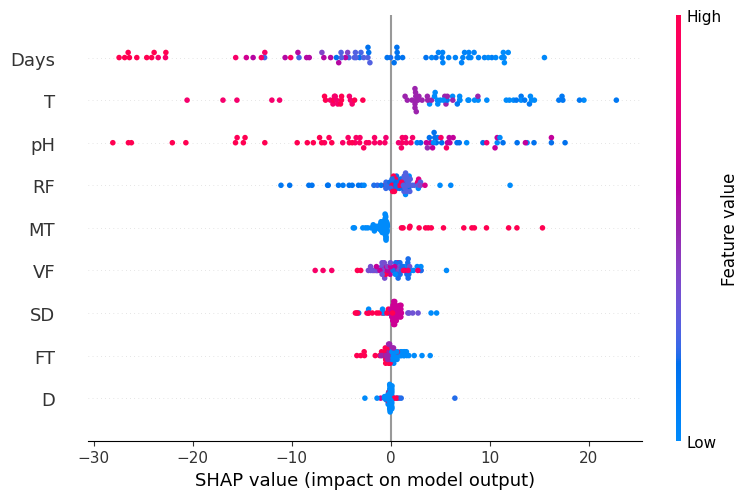

In [27]:
import shap
explainer = shap.TreeExplainer(xgb5, X_train)
shap_values = explainer.shap_values(X_test)
plt.style.use("default")
shap.summary_plot(shap_values, X_test, feature_names=["FT", "MT", "VF", "pH", "T", "Days", "D", "SD", "RF"])

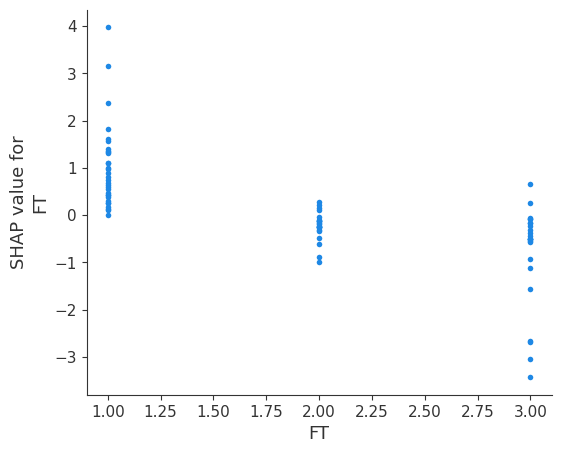

In [28]:
shap.dependence_plot("FT",shap_values,X_test,interaction_index=None,show=True)

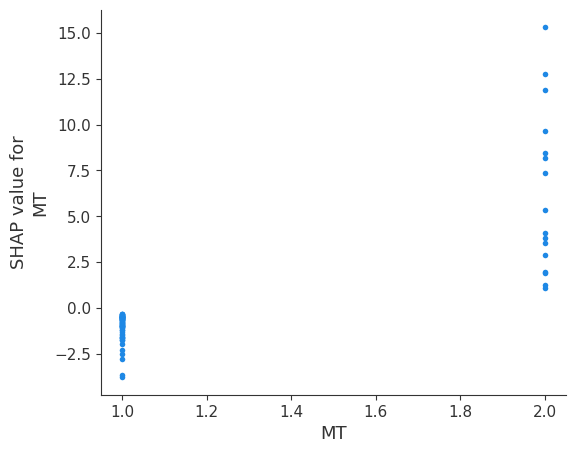

In [29]:
shap.dependence_plot("MT",shap_values,X_test,interaction_index=None,show=True)

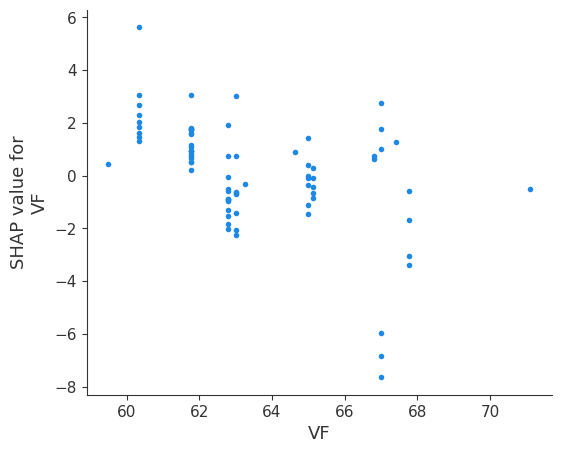

In [30]:
shap.dependence_plot("VF",shap_values,X_test,interaction_index=None,show=True)

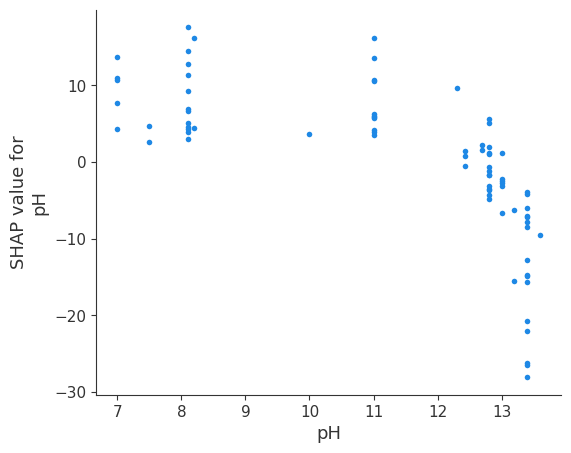

In [31]:
shap.dependence_plot("pH",shap_values,X_test,interaction_index=None,show=True)

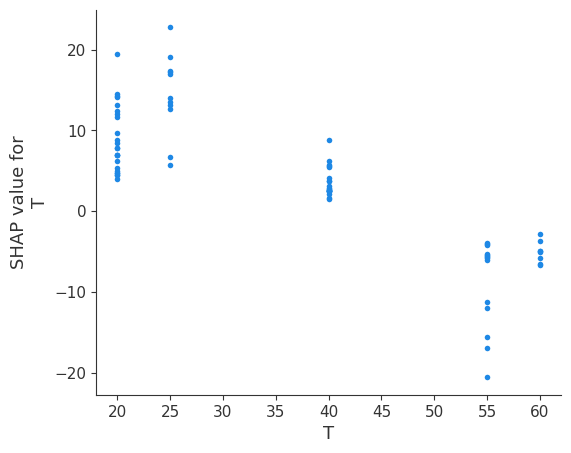

In [32]:
shap.dependence_plot("T",shap_values,X_test,interaction_index=None,show=True)

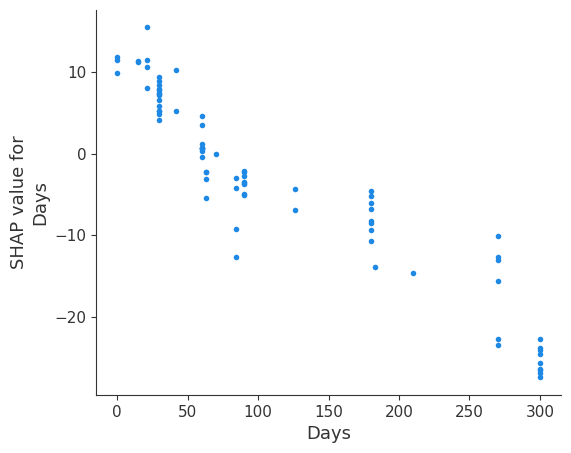

In [33]:
shap.dependence_plot("Days",shap_values,X_test,interaction_index=None,show=True)

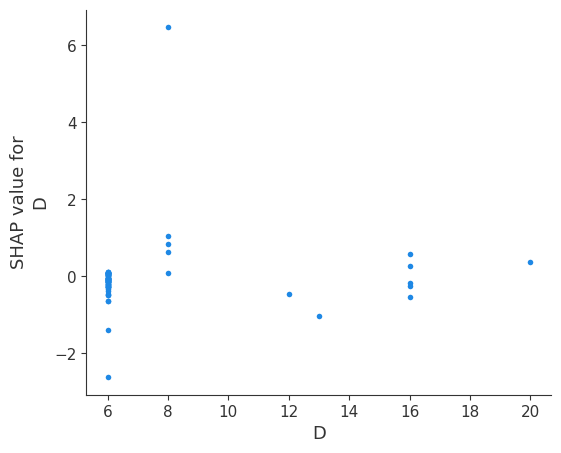

In [34]:
shap.dependence_plot("D",shap_values,X_test,interaction_index=None,show=True)

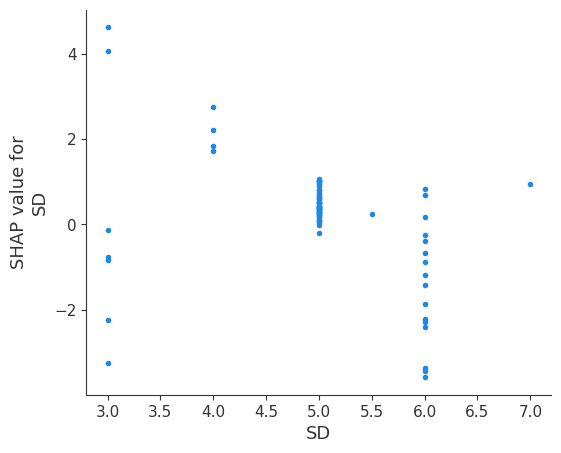

In [35]:
shap.dependence_plot("SD",shap_values,X_test,interaction_index=None,show=True)

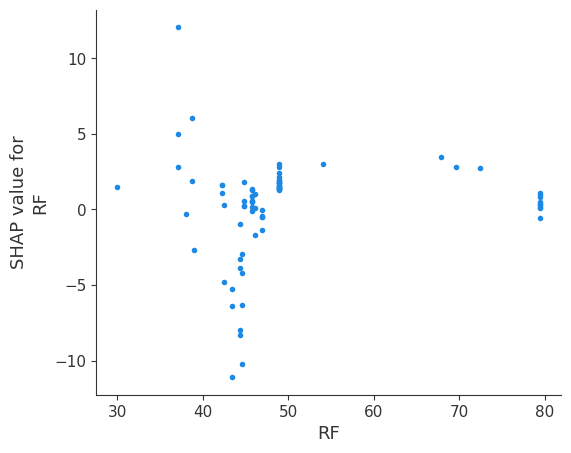

In [36]:
shap.dependence_plot("RF",shap_values,X_test,interaction_index=None,show=True)

In [36]:
best_p = sorted(p, reverse=True)[:11]
best_seed = []
print(best_p)
for i in best_p:
    ram_best_seed = p.index(i) + 1
    best_seed.append(ram_best_seed)
print(best_seed)

[0.921634415855542, 0.9112543166177671, 0.9109954629227152, 0.9005009262793212, 0.8977396627277877, 0.8960891932961756, 0.892915477303931, 0.8926741159337799, 0.8913038563431499, 0.8910149371875341, 0.8893295034529821]
[281, 483, 469, 954, 90, 137, 857, 924, 951, 946, 288]


In [37]:
test_scores = []
for i in best_seed:
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=i)
    xgb5.fit(X_train, Y_train)
    ram_score = xgb5.score(X_test, Y_test)
    Y_list = Y_test.tolist()
    Y_predictlist = xgb5.predict(X_test).tolist()
    print("----------------------------------------------------------------------------")
    print("随机种子:", i)
    print("训练R2:", xgb5.score(X_train, Y_train))
    print("测试R2:", xgb5.score(X_test, Y_test))
    print("SSE:", SSE(Y_list, Y_predictlist))
    print("MSE:", MSE(Y_list, Y_predictlist))
    print("RMSE:", RMSE(Y_list, Y_predictlist))
    print("MAE:", MAE(Y_list, Y_predictlist))
    print("----------------------------------------------------------------------------\n")
    test_scores.append(ram_score)
print(test_scores) #281 469 954 857 951 924

----------------------------------------------------------------------------
随机种子: 281
训练R2: 0.987406297939178
测试R2: 0.9300080026116994
SSE: 2326.4848269881695
MSE: 29.82672855113038
RMSE: 5.461385222737028
MAE: 3.7830556117912226
----------------------------------------------------------------------------

----------------------------------------------------------------------------
随机种子: 483
训练R2: 0.9908376832744417
测试R2: 0.8857281016544384
SSE: 3673.5346860094546
MSE: 47.096598538582754
RMSE: 6.862696156656125
MAE: 4.490673469480551
----------------------------------------------------------------------------

----------------------------------------------------------------------------
随机种子: 469
训练R2: 0.9883808647383121
测试R2: 0.9215697507969244
SSE: 3083.492261711759
MSE: 39.53195207322768
RMSE: 6.287444001597762
MAE: 4.500443225889067
----------------------------------------------------------------------------

-------------------------------------------------------------------------

In [38]:
print(shap_values)
print(shap_values.shape)

[[-1.30145996e-01 -5.54068838e-01 -7.13785409e-01  4.44209644e+00
   2.50032483e+00  7.45124409e+00  4.52802548e-02 -2.41094105e+00
  -2.83584494e-01]
 [-1.56996030e+00 -2.54820744e+00 -6.84390445e+00 -2.07071472e+01
   5.71246801e+00 -2.23186359e+00 -2.53249155e-01 -1.32105131e-03
  -6.38539429e+00]
 [-2.55138375e-01 -7.58746616e-01  1.31949738e+00  1.07510890e+01
   2.72639830e+00 -8.23919635e+00  7.23938077e-02  6.20302762e-01
   1.26114288e+00]
 [ 3.00423717e-01 -1.19348548e+00 -2.02948584e+00 -4.92674573e-01
   9.70115025e+00 -2.68872009e+01 -1.10624529e-01 -3.58273923e+00
   1.28867441e-01]
 [ 8.06105270e-01  8.44633204e+00 -4.95921039e-01  5.62222907e+00
  -4.98559722e+00 -4.35953738e+00 -4.52264755e-01  9.39399948e-01
   2.81198096e+00]
 [-9.34594297e-01 -5.30067134e-01  1.58712727e+00  1.05320976e+01
  -4.07325441e+00  8.41545632e+00  1.21926675e-01  3.48526033e-01
   1.72960847e+00]
 [ 1.37846052e-02 -1.60368242e+00 -9.16961823e-01 -2.73847490e+00
   1.41074842e+01 -2.6409820

In [41]:
print(xgb5.feature_importances_)

[0.03111205 0.24645905 0.03647809 0.15458113 0.14361605 0.1175855
 0.09959153 0.07126883 0.09930772]


In [42]:
xgb.plot_importance(xgb5)

AttributeError: 'XGBRegressor' object has no attribute 'plot_importance'